<h1 align=middle style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Support Vector Machine
</font>
</h1>

In [55]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y= (iris["target"] == 2).astype(np.float64)

In [56]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])


svm_clf.fit(X, y)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [57]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

<h1 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Non Linear SVM Classification
</font>
</h1>

In [58]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


X, y = make_moons(n_samples=100, noise=0.15)

ploynomial_svm_clf = Pipeline([
    ("polyfeatures", PolynomialFeatures(degree=3)), 
    ("scaler", StandardScaler()), 
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [59]:
ploynomial_svm_clf.fit(X, y)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polyfeatures', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

Let's visualize it :

In [60]:
import matplotlib.pyplot as plt
import numpy as np


def plot_model_eval(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

    plt.xlabel('X1')
    plt.ylabel('X2')


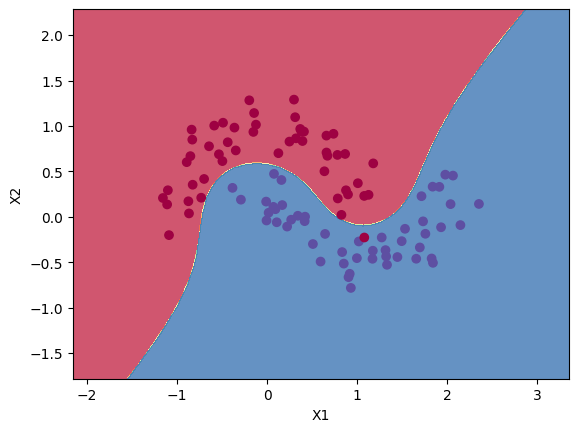

In [61]:
plot_model_eval(ploynomial_svm_clf, X, y)

This method of adding features might cause the data to explode (something like gradient expolosion)

But we can use this method to avoid this :

In [62]:
from sklearn.svm import SVC


poly_kernal_svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("svc_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

In [63]:
poly_kernal_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc_clf', SVC(C=5, coef0=1, kernel='poly'))])

# RBF Gaussian

In [64]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=5))])

Let's play with gamma and C :

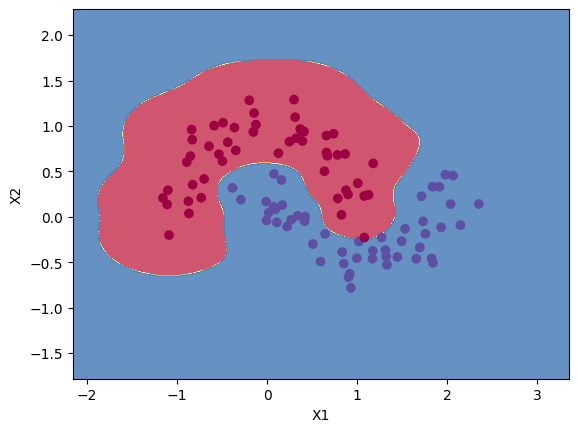

In [65]:
plot_model_eval(rbf_kernel_svm_clf, X, y)

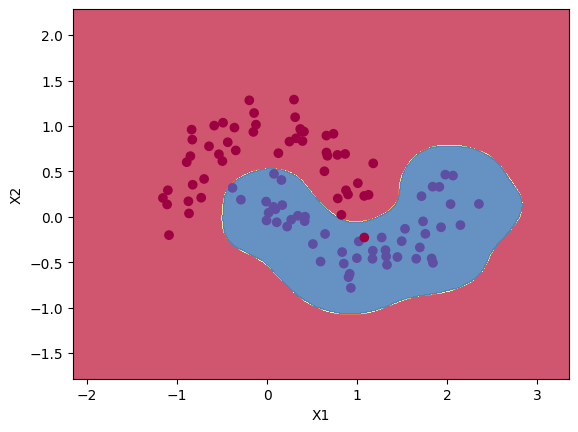

In [66]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

plot_model_eval(rbf_kernel_svm_clf, X, y)

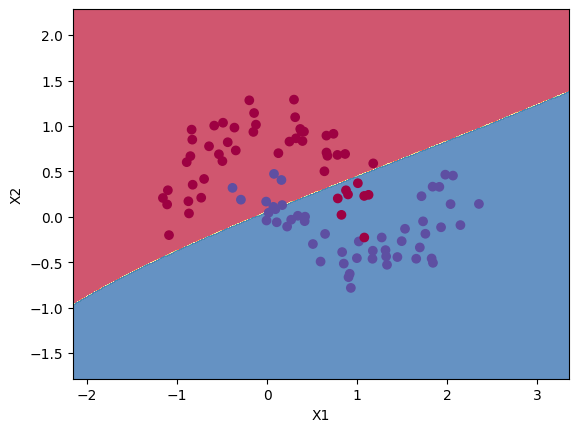

In [67]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

plot_model_eval(rbf_kernel_svm_clf, X, y)

<h1 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
SVM Regression
</font>
</h1>

In [75]:
from sklearn.svm import LinearSVR


svm_reg = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm_reg", LinearSVR(epsilon=1.5))
])

svm_reg.fit(X, y)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(epsilon=1.5))])

Keep in mind the scaling in neccessary

And for non-linear regression :

In [77]:
from sklearn.svm import SVR



svm_poly_reg = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm_poly_reg", SVR(kernel="poly", degree=2, C=100, epsilon=0.1))
])
svm_poly_reg.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_poly_reg', SVR(C=100, degree=2, kernel='poly'))])

In [80]:
svm_poly_reg.predict([[0, 0.2]])

array([0.8529659])

Good Enough